In [302]:
import datetime
import os
import sys
from datetime import timedelta, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df = pd.read_csv('all_posts.csv')
df.head()

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,...,Azure,GCP,BASH,SAP,Git,Docker,Keras,excel,snowflake,job_category
0,Data Scientist - Finance,"Gametime United, Inc.",Remote,6d,$173K - $205K (Employer est.),About Us:\nLive experiences help people cross ...,4.5,51 to 200 Employees,2013,Company - Private,...,0,0,0,0,1,0,0,0,0,Data Science
1,Data Scientist 1,MidAmerican Energy,"Des Moines, IA",10d,$74K - $87K (Employer est.),The Data Scientist I works on data and analyti...,4.1,1001 to 5000 Employees,2000,Subsidiary or Business Segment,...,0,0,0,0,0,0,0,0,0,Data Science
2,Junior Data Scientist,"BearingPoint Consulting, Inc. USA","Chicago, IL",24h,$80K - $117K (Glassdoor est.),As a Junior Data Scientist at BearingPoint you...,4.1,51 to 200 Employees,0,Company - Private,...,0,0,0,0,0,0,0,1,0,Data Science
3,Data Scientist,ClosedLoop,United States,24h,NaN,About ClosedLoop:\nClosedLoop.ai is healthcare...,4.8,51 to 200 Employees,2017,Company - Private,...,0,0,0,0,0,0,0,1,0,Data Science
4,Data Scientist,BlackLine,Remote,7d,$114K - $176K (Employer est.),Make Your Mark::\nBlackline is seeking a dynam...,3.3,1001 to 5000 Employees,2001,Company - Public,...,0,0,0,0,0,0,0,0,0,Data Science


In [379]:
df["post_date"] = pd.to_datetime(df["post_date"])

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   job_title         2092 non-null   object        
 1   company_name      2092 non-null   object        
 2   location          2092 non-null   object        
 3   days_posted       2092 non-null   object        
 4   salary_estimate   1760 non-null   object        
 5   job_description   2092 non-null   object        
 6   company_rating    2092 non-null   float64       
 7   company_size      2092 non-null   object        
 8   company_founded   2092 non-null   int64         
 9   company_type      2092 non-null   object        
 10  company_industry  2092 non-null   object        
 11  company_sector    2092 non-null   object        
 12  company_revenue   2092 non-null   object        
 13  post_date         2092 non-null   datetime64[ns]
 14  age               2092 n

# As we can see that we have some missing values for salary_estimate

C:\Users\User\AppData\Local\Temp\ipykernel_20756\836834282.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.average,color="purple")


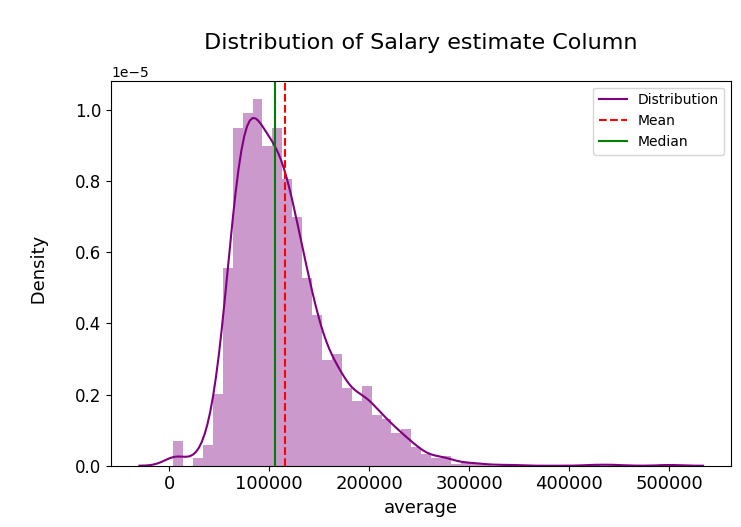

In [381]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Salary estimate Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.average,color="purple")

# Calculate the mean and median of the 'average' column
mean = df.average.mean()
median = df.average.median()

# Add vertical lines for the mean and median
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')

plt.legend({'Distribution':df.average, 'Mean':mean,'Median':median })

plt.show()

Because this is right skewed, as we can see median represents the data better so we will replace the null values with median.

In [382]:
df.average.describe()

count      1760.000000
mean     115598.835227
std       50105.012259
min        4000.000000
25%       80000.000000
50%      106000.000000
75%      139000.000000
max      500000.000000
Name: average, dtype: float64

In [383]:
# let's replace the null average, start and end  values with the median
df.average.fillna(df.average.median(), inplace=True)
df.start.fillna(df.start.median(), inplace=True)
df.end.fillna(df.end.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   job_title         2092 non-null   object        
 1   company_name      2092 non-null   object        
 2   location          2092 non-null   object        
 3   days_posted       2092 non-null   object        
 4   salary_estimate   1760 non-null   object        
 5   job_description   2092 non-null   object        
 6   company_rating    2092 non-null   float64       
 7   company_size      2092 non-null   object        
 8   company_founded   2092 non-null   int64         
 9   company_type      2092 non-null   object        
 10  company_industry  2092 non-null   object        
 11  company_sector    2092 non-null   object        
 12  company_revenue   2092 non-null   object        
 13  post_date         2092 non-null   datetime64[ns]
 14  age               2092 n

In [305]:
df[["company_rating", "age", "start", "end", "average"]].describe()

,company_rating,age,start,end,average
count,2092.000000,2092.000000,1760.000000,1760.000000,1760.000000
mean,3.877390,439.665870,94600.693182,136596.977273,115598.835227
std,0.574203,785.894694,39488.911609,63782.300684,50105.012259
min,1.000000,0.000000,4000.000000,4000.000000,4000.000000
25%,3.600000,17.000000,66000.000000,92000.000000,80000.000000
50%,3.900000,45.000000,86000.000000,124000.000000,106000.000000
75%,4.200000,157.000000,115000.000000,163000.000000,139000.000000
max,5.000000,2023.000000,350000.000000,650000.000000,500000.000000


In [306]:
# For salary values we see 4k so since we assume that our salary data is annually, there must be a mistake. let's check it out.
ind = df[df['average'] < 20000].index
df.loc[ind, ["start","end", "average"]] = df.loc[ind, ["start","end", "average"]] * 12
df.iloc[ind][["start","end", "average"]] # now it's fixed

,start,end,average
397,72000.0,132000.0,102000.0
740,84000.0,120000.0,102000.0
1011,72000.0,72000.0,72000.0
1091,60000.0,96000.0,78000.0
1176,72000.0,84000.0,78000.0
1187,60000.0,60000.0,60000.0
1224,60000.0,84000.0,72000.0
1231,48000.0,48000.0,48000.0
1261,60000.0,84000.0,72000.0
1347,48000.0,72000.0,60000.0


In [307]:
df[["company_rating", "age", "start", "end", "average"]].describe()
# Now we don't see so small numbers on salary values. 
# there is one more issue and that's age. we see 0 as minimum value. let's check it out.
df.company_founded.replace(0, np.nan, inplace=True)
df.age.replace(2023, np.nan, inplace=True)
df[["company_rating", "age", "start", "end", "average"]].describe()


,company_rating,age,start,end,average
count,2092.000000,1680.000000,1760.000000,1760.000000,1760.000000
mean,3.877390,51.372024,95025.693182,137184.477273,116105.085227
std,0.574203,56.215861,38876.962049,63032.481695,49402.656140
min,1.000000,0.000000,24000.000000,25000.000000,24500.000000
25%,3.600000,13.000000,66000.000000,93000.000000,80500.000000
50%,3.900000,29.000000,86000.000000,125000.000000,106500.000000
75%,4.200000,67.250000,115000.000000,163000.000000,139000.000000
max,5.000000,398.000000,350000.000000,650000.000000,500000.000000


In [308]:
# in age section we have 398 years old company. let's check it out.
df[df.age == 398] # this must be the government company.

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,...,Azure,GCP,BASH,SAP,Git,Docker,Keras,excel,snowflake,job_category
1370,DATA REPORTING ANALYST,NYC Careers,Manhattan,30d+,$71K - $81K (Employer est.),DATA REPORTING ANALYST\nApply\nDATA REPORTING ...,3.6,Unknown,1625.0,Government,...,0,0,0,0,0,0,0,1,0,Data Analytics
1389,Data Analyst,NYC Careers,"New York, NY",17d,$62K - $68K (Employer est.),Data Analyst\nApply\nData Analyst\nAgency: DEP...,3.6,Unknown,1625.0,Government,...,0,0,0,0,0,0,0,1,0,Data Analytics
1509,"Data Analyst, PNA",NYC Careers,Long Island-Queens,30d+,$68K - $100K (Employer est.),"Data Analyst, PNA\nApply\nData Analyst, PNA\nA...",3.6,Unknown,1625.0,Government,...,0,0,0,0,0,0,0,1,0,Data Analytics
1541,GIS Analyst,NYC Careers,"Brooklyn, NY",8d,$59K - $125K (Employer est.),GIS Analyst\nApply\nGIS Analyst\nAgency: TECHN...,3.6,Unknown,1625.0,Government,...,0,0,0,0,1,0,0,0,0,Other


In [309]:
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 2092
No. of columns in the dataset: 43


In [310]:
df["state"] = df[~df.location.isin(['Remote',"United States"])].location.str.split(",").str[1].str.strip()
df["state"].unique()

array([nan, 'IA', 'IL', 'VA', 'CA', 'TX', 'MN', 'NJ', 'MD', 'AZ', 'PA',
       'NY', 'OH', 'GA', 'NC', 'AL', 'MI', 'TN', 'CT', 'WA', 'UT', 'MA',
       'SC', 'DC', 'CO', 'FL', 'VT', 'IN', 'KS', 'PR', 'ME', 'MS', 'WI',
       'NV', 'Bergen', 'Contra Costa', 'MO', 'OR', 'NE', 'OK', 'AR', 'RI',
       'NM', 'AK', 'KY', 'DE', 'New Hanover', 'NH', 'HI', 'ID', 'MT',
       'LA', 'WV'], dtype=object)

In [311]:
ind = df.loc[df.state.isin(["Bergen","Contra Costa","New Hanover"])].index
df.loc[ind, 'state'] = df.loc[ind, 'location'].str[-2:]
df["state"].unique()

array([nan, 'IA', 'IL', 'VA', 'CA', 'TX', 'MN', 'NJ', 'MD', 'AZ', 'PA',
       'NY', 'OH', 'GA', 'NC', 'AL', 'MI', 'TN', 'CT', 'WA', 'UT', 'MA',
       'SC', 'DC', 'CO', 'FL', 'VT', 'IN', 'KS', 'PR', 'ME', 'MS', 'WI',
       'NV', 'MO', 'OR', 'NE', 'OK', 'AR', 'RI', 'NM', 'AK', 'KY', 'DE',
       'NH', 'HI', 'ID', 'MT', 'LA', 'WV'], dtype=object)

Now we have proper state names

In [312]:
df[df["state"].isnull()].location.unique()

array(['Remote', 'United States', 'Georgia', 'California', 'Indiana',
       'Michigan', 'New Jersey', 'Texas', 'Ohio', 'Illinois',
       'Pennsylvania', 'Oregon', 'Virginia', 'Minnesota', 'Colorado',
       'Delaware', 'North Carolina', 'Massachusetts', 'Tennessee', 'Utah',
       'Florida', 'Arizona', 'Maryland', 'Oklahoma', 'Manhattan',
       'New York State', 'Washington State', 'Minneapolis-Saint Paul',
       'Nevada', 'Long Island-Queens'], dtype=object)

# let's look at top 10 States with Most Number of Jobs by each job category

In [313]:
df.job_category.value_counts()

job_category
Data Analytics               827
Data Science                 792
Machine Learning Engineer    378
Other                         95
Name: count, dtype: int64

Text(0.5, 0, 'Number of Job Posts')

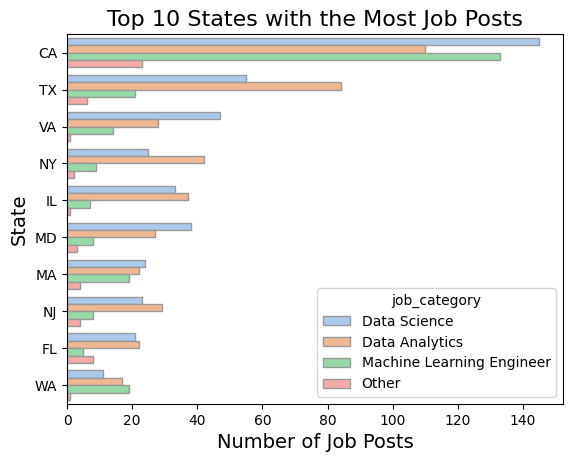

In [314]:
# Get the top 10 states with the most rows
top_10_states = df['state'].value_counts().nlargest(10).index

# Filter the DataFrame to include only these states
df_top_10_states = df[df['state'].isin(top_10_states)]

# Plot the data
ax = sns.countplot(
    data=df_top_10_states, hue="job_category", y="state",
    palette="pastel", edgecolor=".6", order=top_10_states
)

plt.title("Top 10 States with the Most Job Posts", fontsize=16, position=(0.5,1.05))
plt.ylabel("State", fontsize=14)
plt.xlabel("Number of Job Posts", fontsize=14)

These professions, as we know, are data-related. So, let's see which state does post the most jobs within those 3 professions.

### Average Salary by states 

# Questions:

* States with Most Number of Jobs.
* Average Minimal and Maximal Salaries in Different States.
* Average Salary in Different States.
* Top 5 Industries with Maximum Number of Data Science Related Job Postings.
* Companies with Maximum Number of Job Openings.
* Job Titles with Most Number of Jobs.
* Salary of Job Titles with Most Number of Jobs.
* Skills Required by Companies for Each Job Title.
* Relation between Average Salary and Education.

# Average Minimal and Maximal Salaries in Different States.

In [315]:
df.job_category.value_counts()

job_category
Data Analytics               827
Data Science                 792
Machine Learning Engineer    378
Other                         95
Name: count, dtype: int64

In [316]:
df.job_category.value_counts()

job_category
Data Analytics               827
Data Science                 792
Machine Learning Engineer    378
Other                         95
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_20756\72627018.py:13: FutureWarning: The provided callable <function max at 0x0000018293F58160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_min = df1.groupby("state")["average"].agg(max_val=np.max, min_val=np.min)
C:\Users\User\AppData\Local\Temp\ipykernel_20756\72627018.py:13: FutureWarning: The provided callable <function min at 0x0000018293F58280> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  max_min = df1.groupby("state")["average"].agg(max_val=np.max, min_val=np.min)
C:\Users\User\AppData\Local\Temp\ipykernel_20756\72627018.py:13: FutureWarning: The provided callable <function max at 0x0000018293F58160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided c

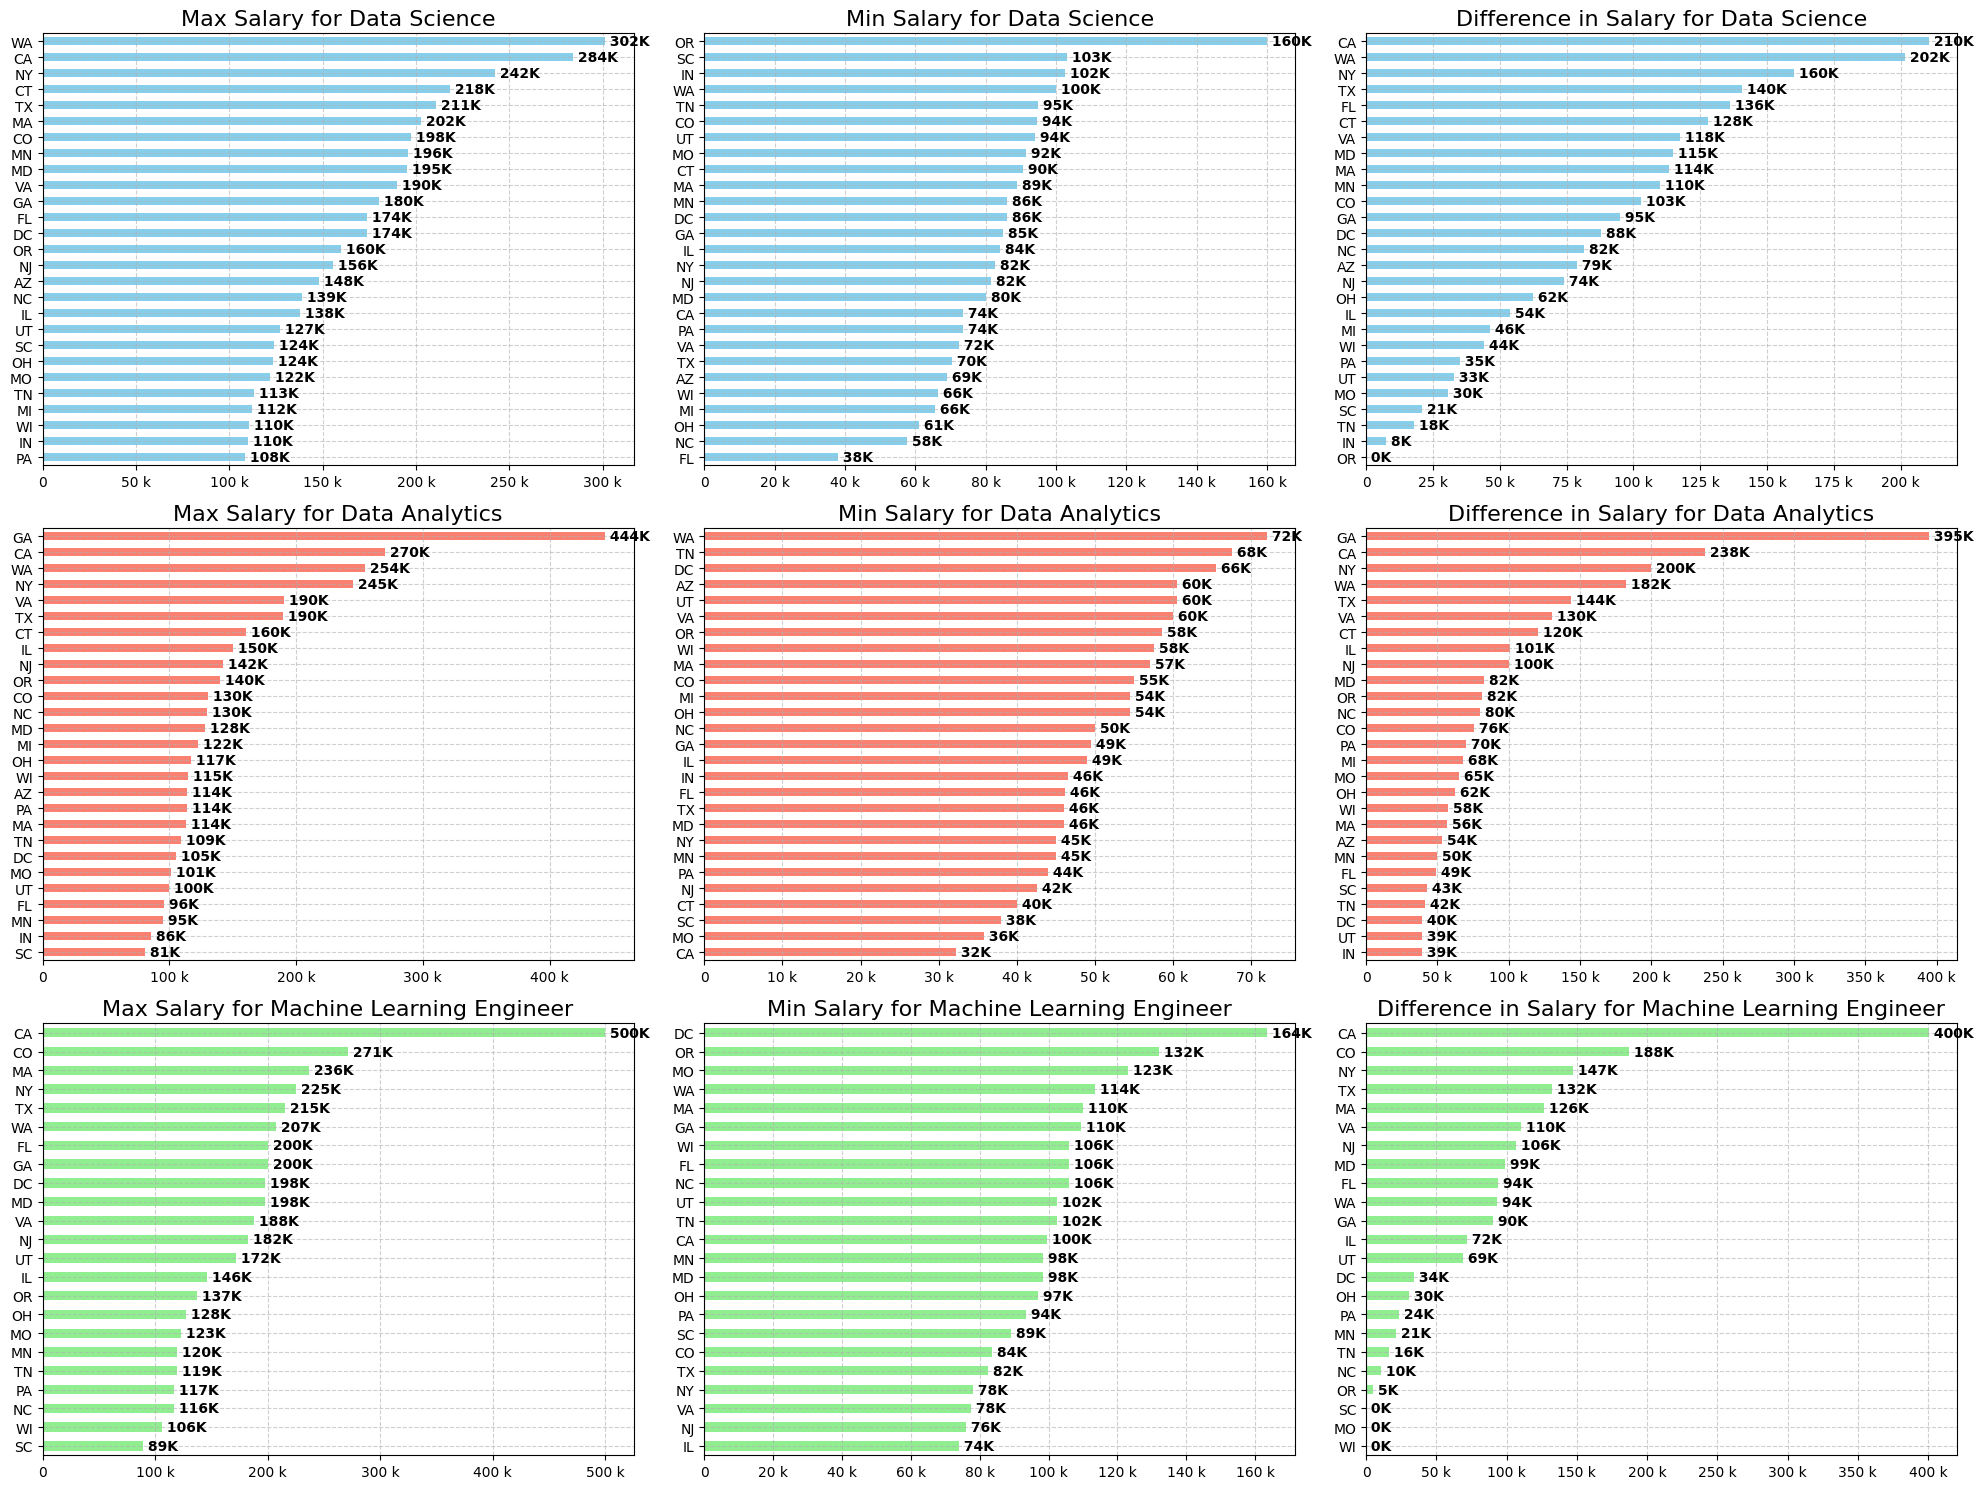

In [317]:
from matplotlib.ticker import EngFormatter

# Define colors for each job category
colors = ['skyblue', 'salmon', 'lightgreen']

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
states_bigger_10 = df.state.value_counts()[df.state.value_counts() > 10].index

for i, job in enumerate(["Data Science", "Data Analytics", "Machine Learning Engineer"]):
    # for this question we can only look at job values
    df1 = df[(df.job_category == job) & (df.state.isin(states_bigger_10))]
    max_min = df1.groupby("state")["average"].agg(max_val=np.max, min_val=np.min)
    max_min["diff"] = max_min["max_val"] - max_min["min_val"] 
    max_min.sort_values("diff", ascending=False)

    if not max_min.empty:
        # Plot the maximum salaries
        max_min['max_val'].sort_values().plot(kind='barh', ax=axes[i][0], color=colors[i])
        axes[i][0].set_title(f'Max Salary for {job}', fontsize=16)

        # Plot the minimum salaries
        max_min['min_val'].sort_values().plot(kind='barh', ax=axes[i][1], color=colors[i])
        axes[i][1].set_title(f'Min Salary for {job}', fontsize=16)

        # Plot the difference in salaries
        max_min['diff'].sort_values().plot(kind='barh', ax=axes[i][2], color=colors[i])
        axes[i][2].set_title(f'Difference in Salary for {job}', fontsize=16)

        # Annotate the bars with their values
        for j in range(3):
            axes[i][j].set_ylabel('')
            axes[i][j].xaxis.set_major_formatter(EngFormatter())
            axes[i][j].grid(True, linestyle='--', alpha=0.6)
            for p in axes[i][j].patches:
                width = p.get_width()
                axes[i][j].text(width, p.get_y() + p.get_height() / 2, f' {width/1000:.0f}K', va='center', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

# Average Salary in Different States.

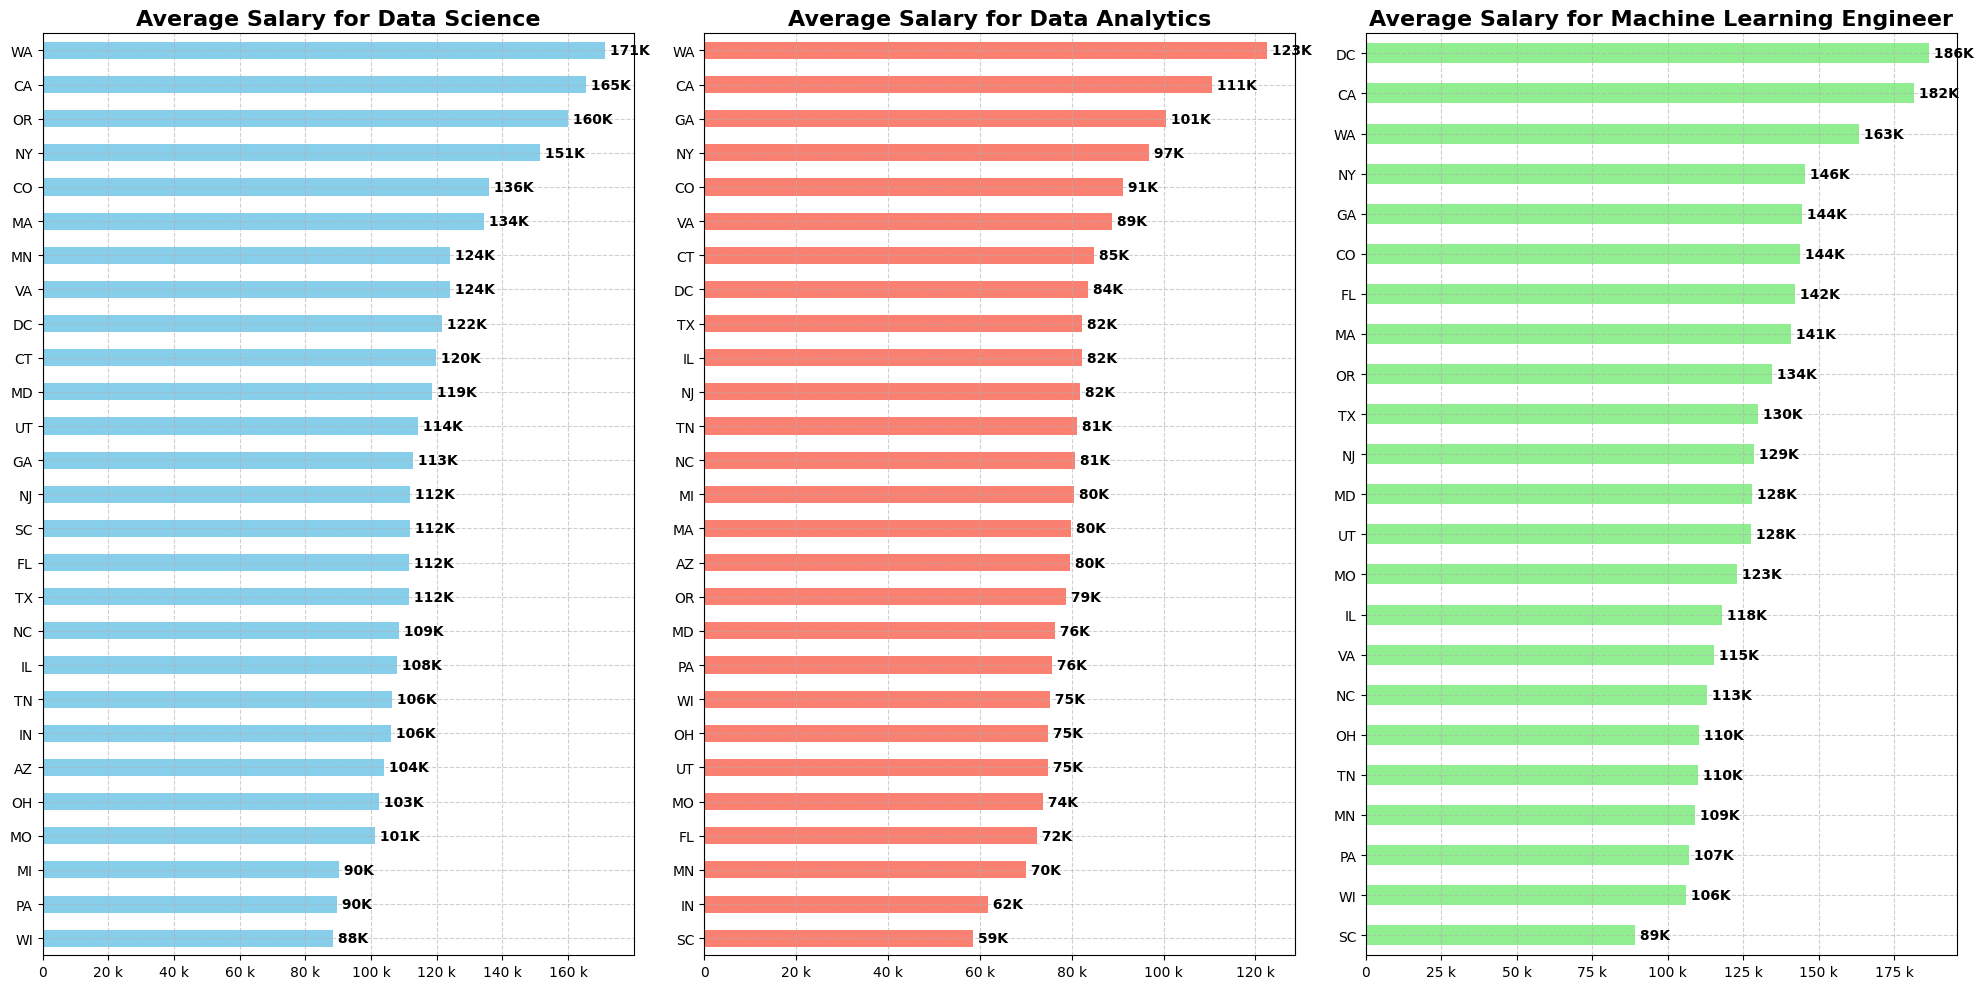

In [318]:
from matplotlib.ticker import EngFormatter

# Define colors for each job category
colors = ['skyblue', 'salmon', 'lightgreen']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
states_bigger_10 = df.state.value_counts()[df.state.value_counts() > 10].index

for i, job in enumerate(["Data Science", "Data Analytics", "Machine Learning Engineer"]):
    df1 = df[(df.job_category == job) & (df.state.isin(states_bigger_10))]
    average = df1.groupby("state")["average"].mean().sort_values().plot(kind='barh', color=colors[i], ax=axes[i])
    
    # Set title with increased font size
    axes[i].set_title(f'Average Salary for {job}', fontsize=16, fontweight='bold')
    
    # Remove y-axis label
    axes[i].set_ylabel('')
    
    # Format x-axis as engineering notation
    axes[i].xaxis.set_major_formatter(EngFormatter())
    
    # Add a grid
    axes[i].grid(True, linestyle='--', alpha=0.6)
    
    # Annotate bars with their values
    for p in axes[i].patches:
        width = p.get_width()
        axes[i].text(width, p.get_y() + p.get_height() / 2, f' {width/1000:.0f}K', va='center', fontweight='bold')
    

plt.tight_layout()
plt.show()

# * Top 5 Industries with Maximum Number of Data Science Related Job Postings.

In [319]:
# let's look at the different industries
df.head().iloc[:, :18]

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,company_industry,company_sector,company_revenue,post_date,age,start,end,average
0,Data Scientist - Finance,"Gametime United, Inc.",Remote,6d,$173K - $205K (Employer est.),About Us:\nLive experiences help people cross ...,4.5,51 to 200 Employees,2013.0,Company - Private,Ticket Sales,"Arts, Entertainment & Recreation",$25 to $100 million (USD),2023-12-20,10.0,173000.0,205000.0,189000.0
1,Data Scientist 1,MidAmerican Energy,"Des Moines, IA",10d,$74K - $87K (Employer est.),The Data Scientist I works on data and analyti...,4.1,1001 to 5000 Employees,2000.0,Subsidiary or Business Segment,Energy & Utilities,"Energy, Mining & Utilities",$1 to $5 billion (USD),2023-12-16,23.0,74000.0,87000.0,80500.0
2,Junior Data Scientist,"BearingPoint Consulting, Inc. USA","Chicago, IL",24h,$80K - $117K (Glassdoor est.),As a Junior Data Scientist at BearingPoint you...,4.1,51 to 200 Employees,NaN,Company - Private,--,--,Unknown / Non-Applicable,2023-12-26,NaN,80000.0,117000.0,98500.0
3,Data Scientist,ClosedLoop,United States,24h,NaN,About ClosedLoop:\nClosedLoop.ai is healthcare...,4.8,51 to 200 Employees,2017.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,2023-12-26,6.0,NaN,NaN,NaN
4,Data Scientist,BlackLine,Remote,7d,$114K - $176K (Employer est.),Make Your Mark::\nBlackline is seeking a dynam...,3.3,1001 to 5000 Employees,2001.0,Company - Public,Software Development,Information Technology,$500 million to $1 billion (USD),2023-12-19,22.0,114000.0,176000.0,145000.0


In [320]:
df.company_sector.value_counts()

company_sector
Information Technology                         678
--                                             156
Healthcare                                     147
Manufacturing                                  130
Management & Consulting                        127
Financial Services                             123
Education                                       92
Government & Public Administration              86
Aerospace & Defense                             74
Retail & Wholesale                              72
Insurance                                       68
Media & Communication                           68
Energy, Mining & Utilities                      53
Pharmaceutical & Biotechnology                  52
Transportation & Logistics                      27
Nonprofit & NGO                                 26
Human Resources & Staffing                      26
Construction, Repair & Maintenance Services     20
Arts, Entertainment & Recreation                18
Real Estate     

Text(0, 0.5, '')

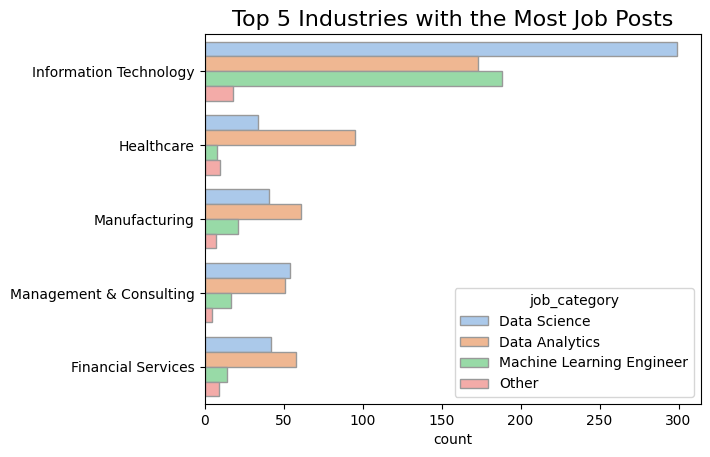

In [321]:
df.company_sector.replace("--", np.nan, inplace=True)
top_5_industries = df.company_sector.value_counts().head().index # top 5 industries

# Filter the DataFrame to include only these industries
df_top_5_industries = df[df['company_sector'].isin(top_5_industries)]

# let's plot them
ax = sns.countplot(
    data=df_top_5_industries, hue="job_category", y="company_sector",
    palette="pastel", edgecolor=".6", order=top_5_industries
)
ax.set_title("Top 5 Industries with the Most Job Posts", fontsize=16, position=(0.5,1.05))
ax.set_ylabel("")

* Companies with Maximum Number of Job Openings.
* Job Titles with Most Number of Jobs.
* Salary of Job Titles with Most Number of Jobs.
* Skills Required by Companies for Each Job Title.
* Relation between Average Salary and Education.

# Top 10 Companies with Maximum Number of Job Openings.

Text(0.5, 0, 'Number of Job Posts')

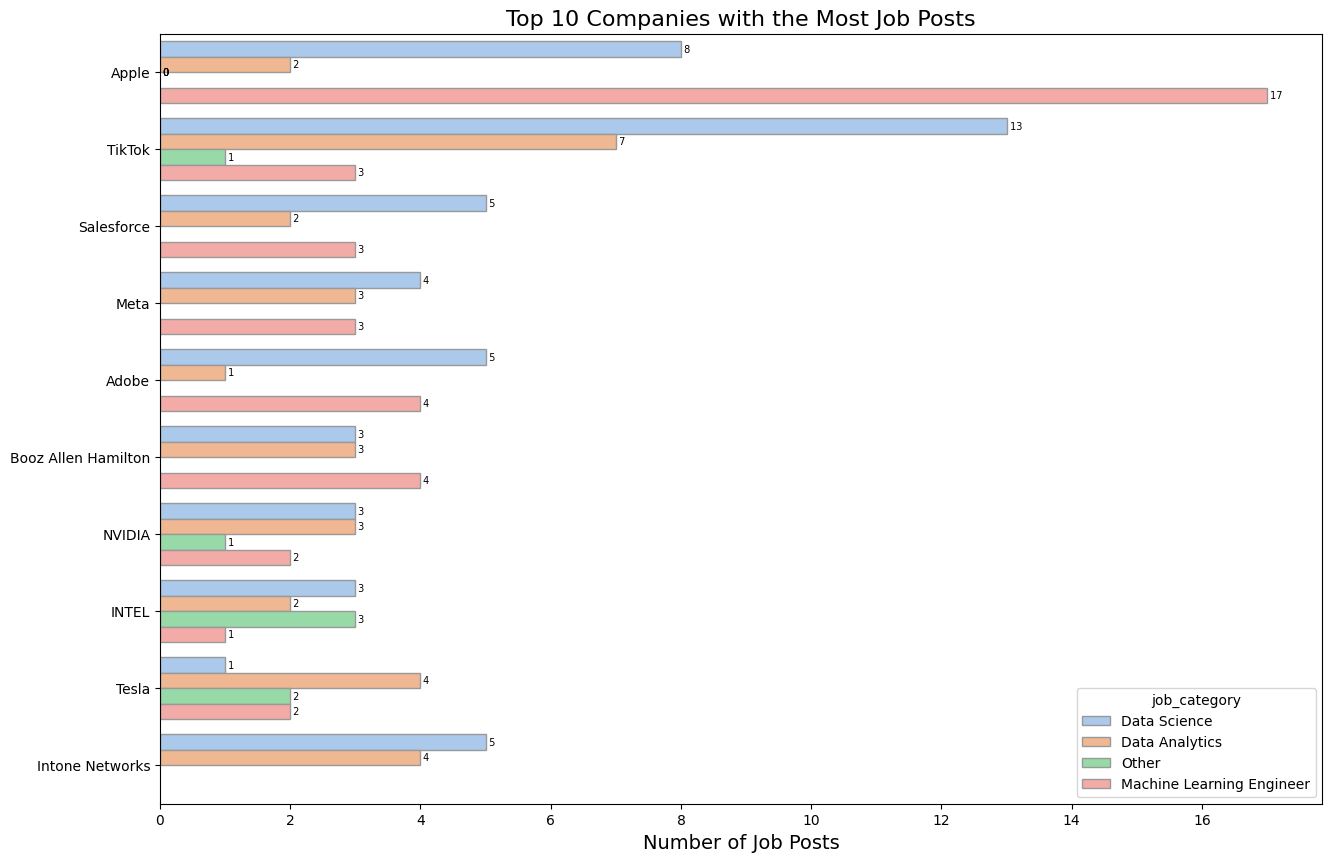

In [322]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
top_10_companies = df.company_name.value_counts().head(10).index

# Filter the DataFrame to include only these industries
df_top_10_companies = df[df['company_name'].isin(top_10_companies)]

# let's plot them
ax = sns.countplot(
    data=df_top_10_companies, hue="job_category", y="company_name",
    palette="pastel", edgecolor=".6", order=top_10_companies
)

# Annotate the bars with their values
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f' {int(width)}', va='center', fontsize=7)


ax.set_title("Top 10 Companies with the Most Job Posts", fontsize=16, position=(0.5,1.05))
ax.set_ylabel("")
ax.set_xlabel("Number of Job Posts", fontsize=14)

In [323]:
df.head()

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,...,GCP,BASH,SAP,Git,Docker,Keras,excel,snowflake,job_category,state
0,Data Scientist - Finance,"Gametime United, Inc.",Remote,6d,$173K - $205K (Employer est.),About Us:\nLive experiences help people cross ...,4.5,51 to 200 Employees,2013.0,Company - Private,...,0,0,0,1,0,0,0,0,Data Science,NaN
1,Data Scientist 1,MidAmerican Energy,"Des Moines, IA",10d,$74K - $87K (Employer est.),The Data Scientist I works on data and analyti...,4.1,1001 to 5000 Employees,2000.0,Subsidiary or Business Segment,...,0,0,0,0,0,0,0,0,Data Science,IA
2,Junior Data Scientist,"BearingPoint Consulting, Inc. USA","Chicago, IL",24h,$80K - $117K (Glassdoor est.),As a Junior Data Scientist at BearingPoint you...,4.1,51 to 200 Employees,NaN,Company - Private,...,0,0,0,0,0,0,1,0,Data Science,IL
3,Data Scientist,ClosedLoop,United States,24h,NaN,About ClosedLoop:\nClosedLoop.ai is healthcare...,4.8,51 to 200 Employees,2017.0,Company - Private,...,0,0,0,0,0,0,1,0,Data Science,NaN
4,Data Scientist,BlackLine,Remote,7d,$114K - $176K (Employer est.),Make Your Mark::\nBlackline is seeking a dynam...,3.3,1001 to 5000 Employees,2001.0,Company - Public,...,0,0,0,0,0,0,0,0,Data Science,NaN


# Which technologies are demanded for Data science/Analytics/ML engineering?

In [324]:
data_science_df = df[df.job_category == "Data Science"]
ml_engineer_df = df[df.job_category == "Machine Learning Engineer"]
data_analytics_df = df[df.job_category == "Data Analytics"]

In [325]:
df.columns

Index(['job_title', 'company_name', 'location', 'days_posted',
       'salary_estimate', 'job_description', 'company_rating', 'company_size',
       'company_founded', 'company_type', 'company_industry', 'company_sector',
       'company_revenue', 'post_date', 'age', 'start', 'end', 'average',
       'Python', 'R', 'PyTorch', 'TensorFlow', 'SQL', 'Java', 'Scala', 'C++',
       'Hadoop', 'Spark', 'Tableau', 'Power BI', 'mongo', 'Scikit-Learn',
       'AWS', 'Azure', 'GCP', 'BASH', 'SAP', 'Git', 'Docker', 'Keras', 'excel',
       'snowflake', 'job_category', 'state'],
      dtype='object')

In [331]:
data_science_df[['Python', 'R', 'PyTorch', 'TensorFlow', 'SQL', 'Java', 'Scala', 'C++',
       'Hadoop', 'Spark', 'Tableau', 'Power BI', 'mongo', 'Scikit-Learn',
       'AWS', 'Azure', 'GCP', 'BASH', 'SAP', 'Git', 'Docker', 'Keras', 'excel',
       'snowflake']].sum().sort_values(ascending=False)

Python          668
SQL             465
R               402
excel           388
Git             245
AWS             236
Tableau         183
Spark           173
Scala           157
PyTorch         132
TensorFlow      130
Azure           119
Java            112
Hadoop           80
Scikit-Learn     79
Power BI         75
C++              57
Keras            47
snowflake        45
Docker           43
GCP              43
SAP              14
BASH             13
mongo            12
dtype: int64

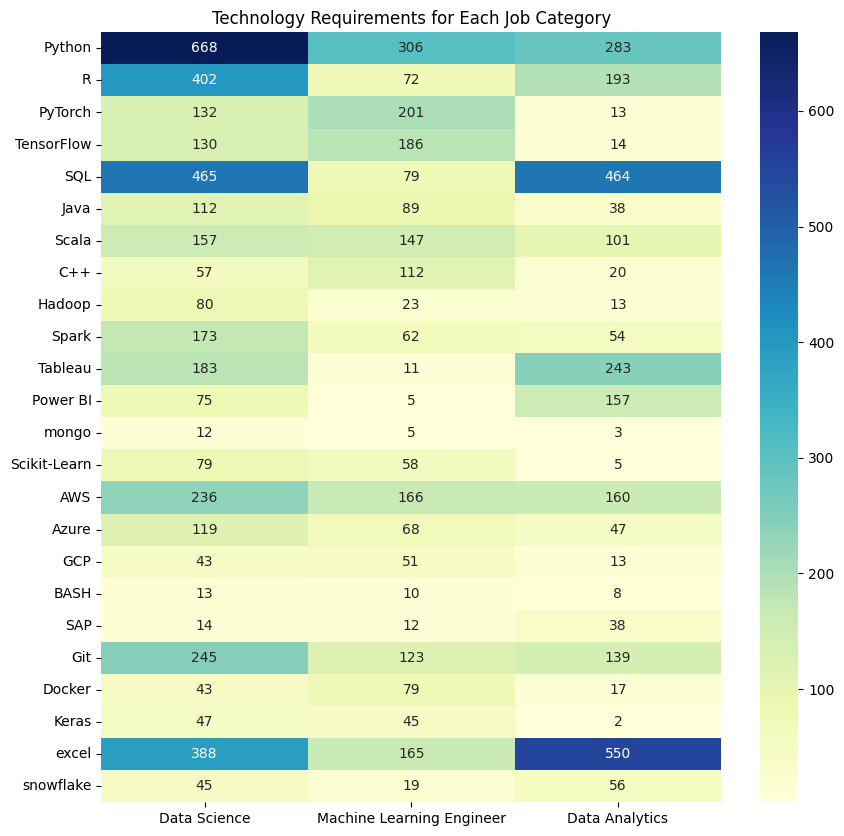

In [342]:
# List of technologies
technologies = ['Python', 'R', 'PyTorch', 'TensorFlow', 'SQL', 'Java', 'Scala', 'C++', 'Hadoop', 'Spark', 'Tableau', 'Power BI', "mongo","Scikit-Learn", "AWS", "Azure", "GCP", "BASH", "SAP", "Git", "Docker", "Keras", "excel", "snowflake"]

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=technologies)

# Calculate the sum for each technology in each job category
heatmap_data['Data Science'] = data_science_df[technologies].sum()
heatmap_data['Machine Learning Engineer'] = ml_engineer_df[technologies].sum()
heatmap_data['Data Analytics'] = data_analytics_df[technologies].sum()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Technology Requirements for Each Job Category')
plt.show()

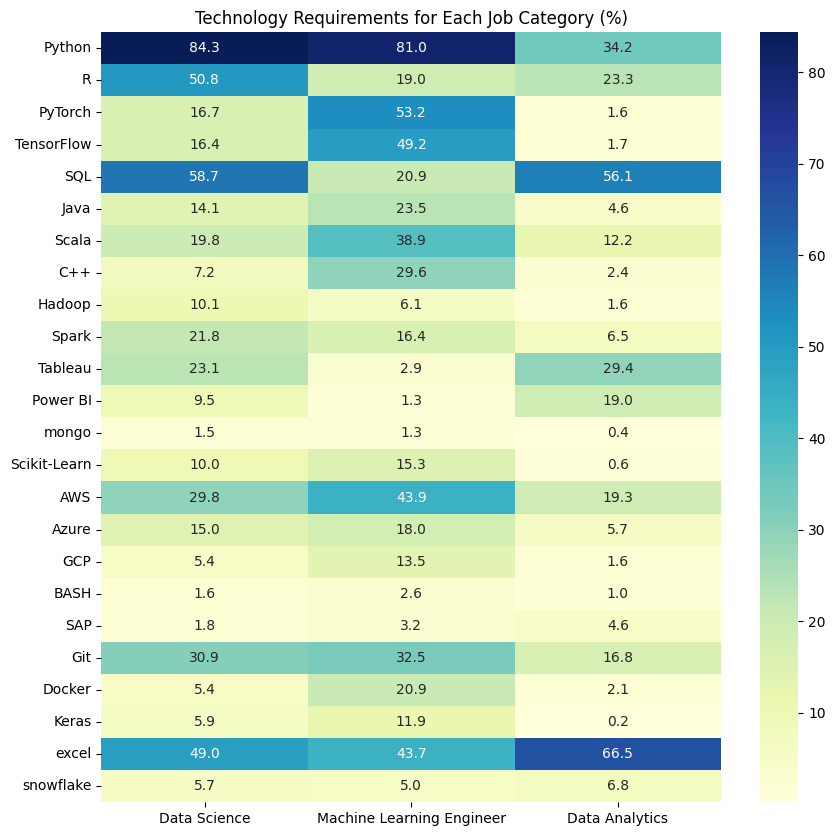

In [341]:
# List of technologies
technologies = ['Python', 'R', 'PyTorch', 'TensorFlow', 'SQL', 'Java', 'Scala', 'C++', 'Hadoop', 'Spark', 'Tableau', 'Power BI', "mongo","Scikit-Learn", "AWS", "Azure", "GCP", "BASH", "SAP", "Git", "Docker", "Keras", "excel", "snowflake"]

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=technologies)

# Calculate the percentage for each technology in each job category
heatmap_data['Data Science'] = data_science_df[technologies].mean()
heatmap_data['Machine Learning Engineer'] = ml_engineer_df[technologies].mean()
heatmap_data['Data Analytics'] = data_analytics_df[technologies].mean()

# Convert to percentages
heatmap_data = heatmap_data * 100

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Technology Requirements for Each Job Category (%)')
plt.show()

In [337]:
df.head()

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,...,GCP,BASH,SAP,Git,Docker,Keras,excel,snowflake,job_category,state
16,Junior Data Annotation Specialist,AllStars-IT,Georgia,30d+,NaN,Junior Data Annotation Specialist\nLevel\nJuni...,4.9,501 to 1000 Employees,2004.0,Unknown,...,0,0,0,0,0,0,0,0,Data Analytics,NaN
27,AI Data Engineer (5175),TSMC,"San Jose, CA",24h,$115K - $150K (Employer est.),"Overview of Role\nAs a Data Engineer, you will...",3.1,10000+ Employees,1987.0,Company - Public,...,0,0,0,1,0,1,1,0,Data Analytics,CA
37,Senior Data Analyst,C.H. Robinson,United States,24h,$65K - $136K (Employer est.),Join us at C.H. Robinson as a Senior Data Anal...,3.6,10000+ Employees,1905.0,Company - Public,...,0,1,0,0,1,0,1,1,Data Analytics,NaN
178,Sr. Data Analyst,BRIK Partners,"Texas City, TX",25d,$30.00 - $70.00 Per Hour (Employer est.),ABOUT THE ROLE\nTYPICAL ACCOUNTABILITIES\nThe ...,5.0,Unknown,NaN,Company - Public,...,0,0,1,0,0,0,1,0,Data Analytics,TX
188,Senior Data Analyst,Cloud Security Services,Remote,30d+,NaN,Cloud Security Services is seeking a senior da...,4.0,Unknown,NaN,Company - Public,...,0,0,0,0,0,0,1,0,Data Analytics,NaN


In [340]:
df.company_size.replace("Unknown", np.nan, inplace=True)
df.company_size.unique()

array(['501 to 1000 Employees', '10000+ Employees', nan,
       '51 to 200 Employees', '1001 to 5000 Employees',
       '5001 to 10000 Employees', '201 to 500 Employees',
       '1 to 50 Employees'], dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_20756\4086178502.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Text(0.5, 1.0, 'Average Salary by Company Size')

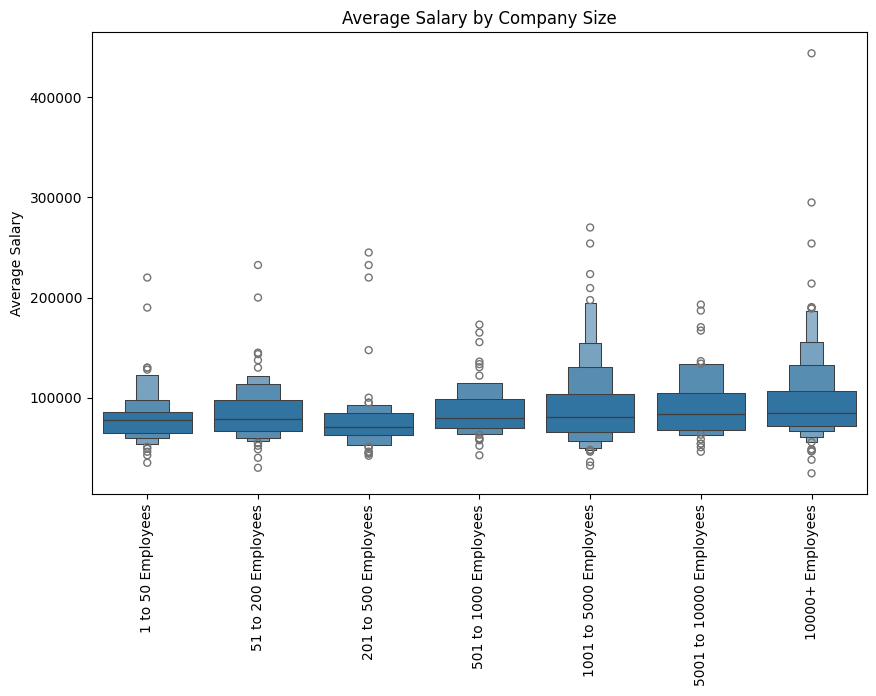

In [367]:
plt.figure(figsize=(10, 6))
ax = sns.boxenplot(x='company_size', y='average', data=df, order=['1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', '501 to 1000 Employees', '1001 to 5000 Employees', '5001 to 10000 Employees', '10000+ Employees'])
ax.set_ylabel('Average Salary')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=90)
plt.title('Average Salary by Company Size')

In [369]:
df.head().iloc[:, :18]

,job_title,company_name,location,days_posted,salary_estimate,job_description,company_rating,company_size,company_founded,company_type,company_industry,company_sector,company_revenue,post_date,age,start,end,average
16,Junior Data Annotation Specialist,AllStars-IT,Georgia,30d+,NaN,Junior Data Annotation Specialist\nLevel\nJuni...,4.9,501 to 1000 Employees,2004.0,Unknown,Software Development,Information Technology,Unknown / Non-Applicable,2023-11-26,19.0,NaN,NaN,NaN
27,AI Data Engineer (5175),TSMC,"San Jose, CA",24h,$115K - $150K (Employer est.),"Overview of Role\nAs a Data Engineer, you will...",3.1,10000+ Employees,1987.0,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),2023-12-26,36.0,115000.0,150000.0,132500.0
37,Senior Data Analyst,C.H. Robinson,United States,24h,$65K - $136K (Employer est.),Join us at C.H. Robinson as a Senior Data Anal...,3.6,10000+ Employees,1905.0,Company - Public,Shipping & Trucking,Transportation & Logistics,$10+ billion (USD),2023-12-26,118.0,65000.0,136000.0,100500.0
178,Sr. Data Analyst,BRIK Partners,"Texas City, TX",25d,$30.00 - $70.00 Per Hour (Employer est.),ABOUT THE ROLE\nTYPICAL ACCOUNTABILITIES\nThe ...,5.0,NaN,NaN,Company - Public,--,NaN,Unknown / Non-Applicable,2023-12-01,NaN,60000.0,140000.0,100000.0
188,Senior Data Analyst,Cloud Security Services,Remote,30d+,NaN,Cloud Security Services is seeking a senior da...,4.0,NaN,NaN,Company - Public,Internet & Web Services,Information Technology,Unknown / Non-Applicable,2023-11-26,NaN,NaN,NaN,NaN


In [362]:
df["day_posted"]  = df.post_date.dt.day_name()
df["day_posted"]

16       Sunday
27      Tuesday
37      Tuesday
178      Friday
188      Sunday
         ...   
2079     Sunday
2080     Sunday
2081     Sunday
2083     Sunday
2091     Sunday
Name: day_posted, Length: 827, dtype: object

# Let's see which days companies making posting

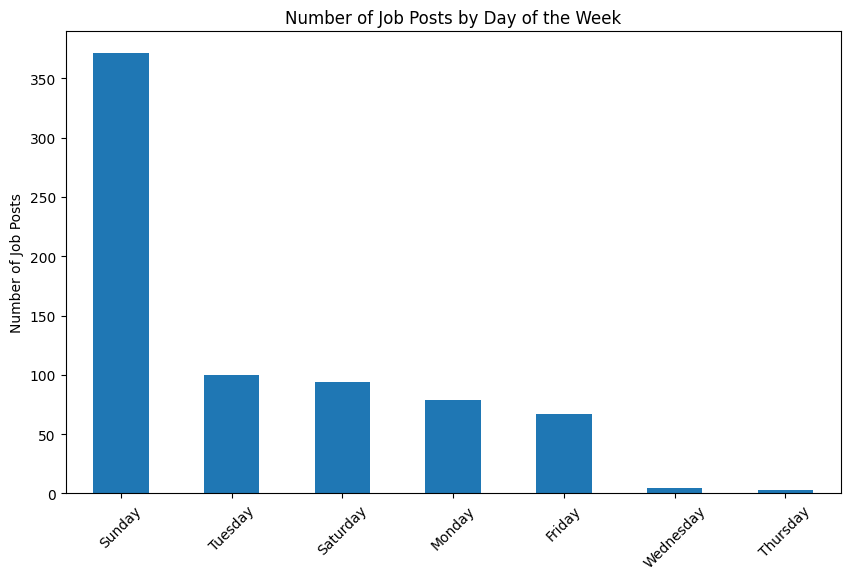

In [368]:
plt.figure(figsize=(10, 6))
ax = df.groupby("day_posted").average.count().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
ax.set_ylabel('Number of Job Posts')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.title.set_text('Number of Job Posts by Day of the Week')